<a href="https://colab.research.google.com/github/Aybuke211/Python_DataScience_Projects/blob/main/Veri_Analizi_ve_Anomali_Tespiti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# kütüphaneleri import edelim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Pythonda uyarıları kapatalım
import warnings
warnings.filterwarnings("ignore")

In [2]:
# veriyi içeri aktaralım
veri = pd.read_csv("/content/olimpiyatlar_temizlenmis_20220204.csv")
veri.head()

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
3,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
4,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


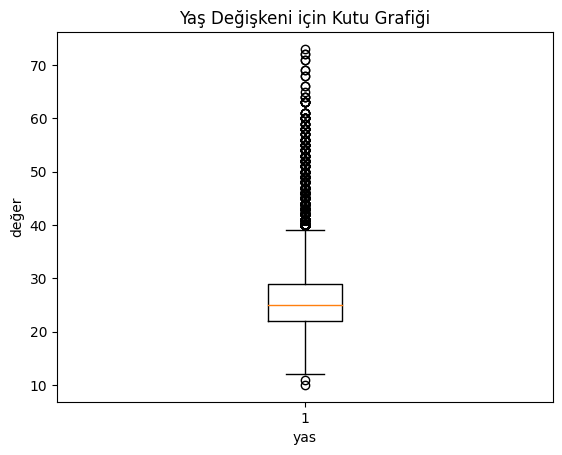

In [3]:
plt.boxplot(veri.yas)
plt.title("Yaş Değişkeni için Kutu Grafiği")
plt.xlabel("yas")
plt.ylabel("değer")
plt.show()

In [4]:
# çubuk grafiğini çizdireceğimiz metot
def plotBar(degisken, n=5):
  veri_ = veri[degisken]
  veri_sayma = veri_.value_counts()
  veri_sayma = veri_sayma[:n]
  plt.figure()
  plt.bar(veri_sayma.index,veri_sayma, color = 'green')
  plt.xticks(veri_sayma.index,veri_sayma.index.values)
  plt.xticks(rotation = 45)
  plt.ylabel("Frekans")
  plt.title("Veri Sıklığı: {}".format(degisken))
  print("{}: \n {}".format(degisken, veri_sayma))


isim: 
 isim
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: count, dtype: int64
cinsiyet: 
 cinsiyet
M    28530
F    11253
Name: count, dtype: int64
takim: 
 takim
United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: count, dtype: int64
uok: 
 uok
USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: count, dtype: int64
sezon: 
 sezon
Summer    34088
Winter     5695
Name: count, dtype: int64
sehir: 
 sehir
London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: count, dtype: int64
spor: 
 spor
Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: count, dtype: int64
etkinlik: 
 etkinlik
Football Men's Football        1269
Ice Hockey Men's Ic

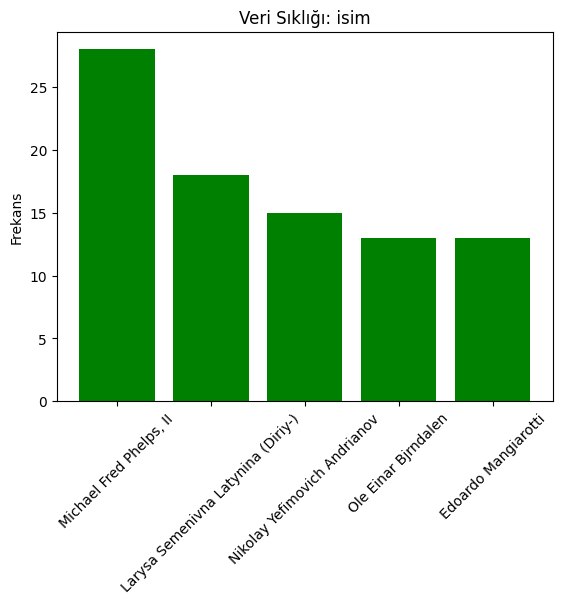

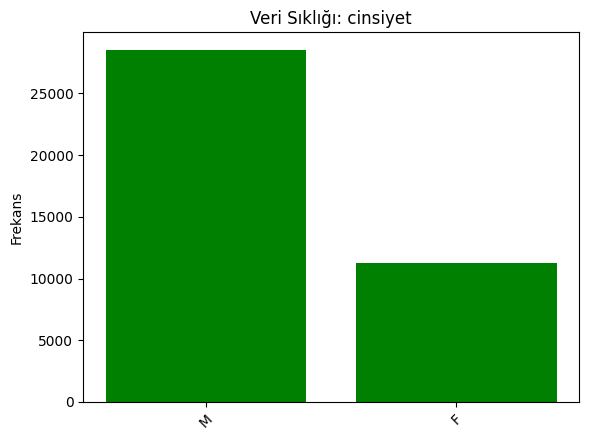

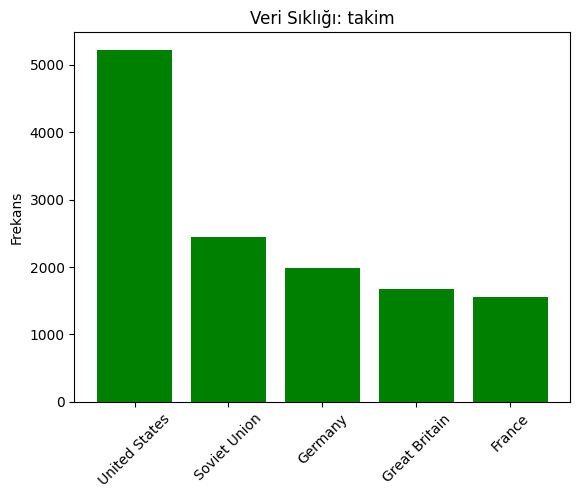

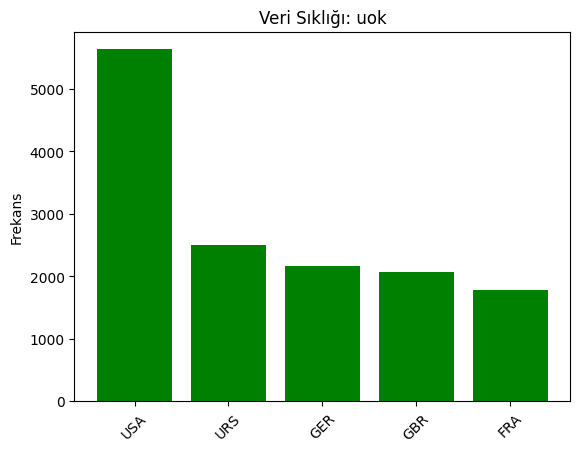

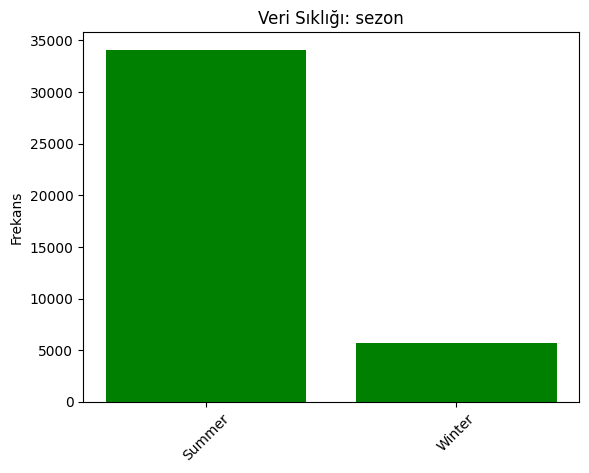

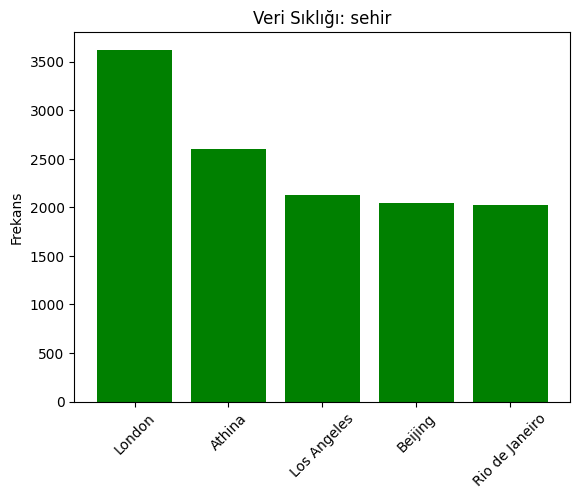

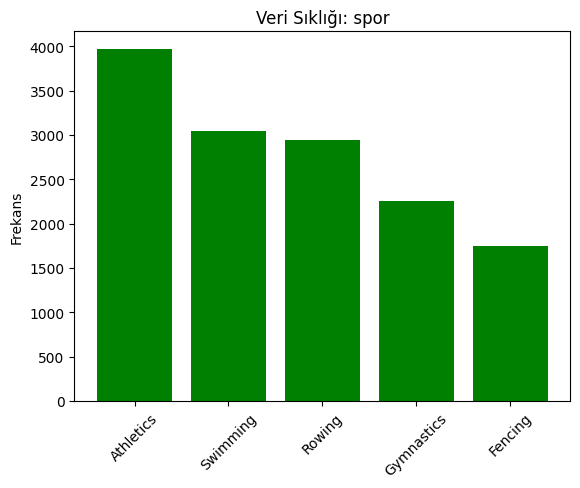

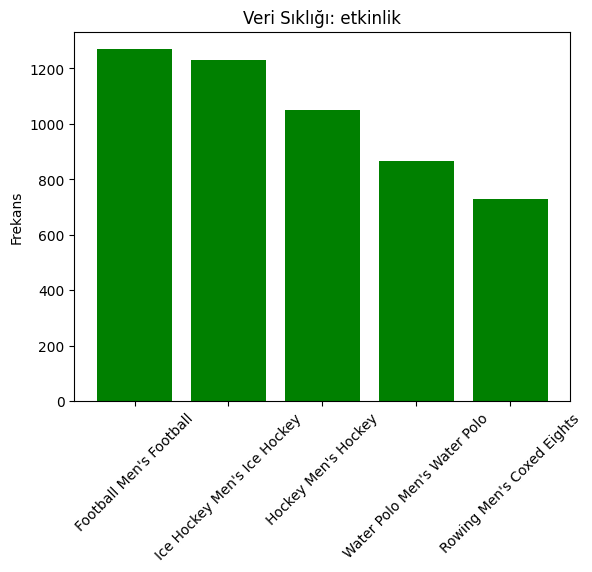

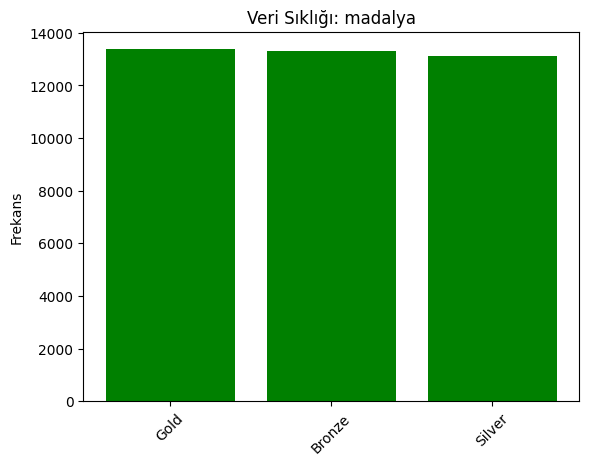

In [5]:
kategorik_degisken = ["isim","cinsiyet","takim","uok","sezon","sehir",
                      "spor","etkinlik","madalya"]
for i in kategorik_degisken:
  plotBar(i)

Cinsiyete Göre Boy ve Ağırlık Karşılaştırılması


In [6]:
erkek = veri[veri.cinsiyet == "M"]
erkek.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [7]:
kadın = veri[veri.cinsiyet == "F"]
kadın.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
17,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
19,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
21,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze


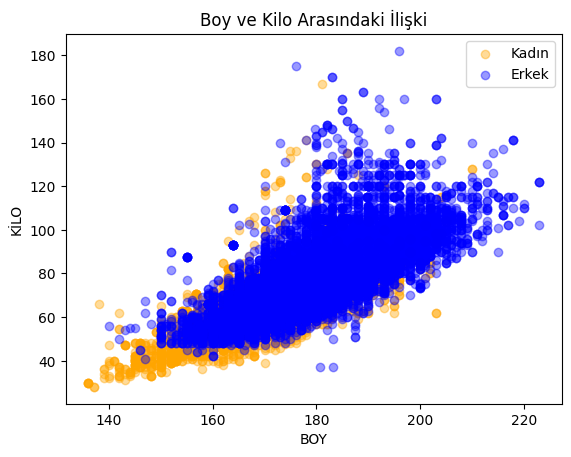

In [8]:
plt.figure()
plt.scatter(kadın.boy, kadın.kilo, alpha = 0.4, label = "Kadın", color = "orange")
plt.scatter(erkek.boy, erkek.kilo, alpha = 0.4, label = "Erkek", color = "blue")
plt.xlabel("BOY")
plt.ylabel("KİLO")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

In [9]:
veri.loc[:,["yas","boy","kilo"]].corr() #korelasyon tablosu

,yas,boy,kilo
yas,1.000000,0.061890,0.136349
boy,0.061890,1.000000,0.794368
kilo,0.136349,0.794368,1.000000


**Madalya ve Yaş Arasındaki İlişki**

In [10]:
# sporcuları altın, gümüş ve bronz madalyaya göre ayıralım
veri_gecici = veri.copy()
veri_gecici = pd.get_dummies(veri_gecici, columns = ["madalya"])
veri_gecici.head(2)


,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False


In [11]:
veri_gecici.loc[:,["yas","madalya_Bronze","madalya_Gold","madalya_Silver"]].corr()

,yas,madalya_Bronze,madalya_Gold,madalya_Silver
yas,1.000000,-0.005584,-0.002576,0.008192
madalya_Bronze,-0.005584,1.000000,-0.504110,-0.496859
madalya_Gold,-0.002576,-0.504110,1.000000,-0.499022
madalya_Silver,0.008192,-0.496859,-0.499022,1.000000


**Takımların Kazandıkları Altın, Gümüş ve Bronz Madalya Sayıları**

*en fazla altın madalya alan takımlar


In [12]:
veri_gecici[["takim","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["takim"],as_index=False).sum().sort_values(by = "madalya_Gold",ascending = False)[:10]

,takim,madalya_Bronze,madalya_Gold,madalya_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
420,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


**Kazanılan Madalyaların Hangi Şehirlerde Kazanıldığı**

In [13]:
veri_gecici[["sehir","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["sehir"],as_index=False).sum().sort_values(by = "madalya_Gold",ascending = False)[:10]

,sehir,madalya_Bronze,madalya_Gold,madalya_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


**Cinsiyete Göre Kazanılan Altın, Gümüş ve Bronz Madalya Sayıları**

In [14]:
veri_gecici[["cinsiyet","madalya_Bronze","madalya_Gold","madalya_Silver"]].groupby(["cinsiyet"],as_index=False).sum().sort_values(by = "madalya_Gold",ascending = False)

,cinsiyet,madalya_Bronze,madalya_Gold,madalya_Silver
1,M,9524,9625,9381
0,F,3771,3747,3735


**Çok Değişkenli Veri Analizi**

*Pivot Tablosu*

In [15]:
veri_pivot = veri.pivot_table(index = "madalya",columns="cinsiyet",
                              values = ["boy","kilo","yas"],
                              aggfunc = {"boy":np.mean,"kilo": np.mean,"yas":[min,max,np.std]})
veri_pivot.head()

boy                   kilo              yas              \
                mean                   mean              max         min   
cinsiyet           F           M          F          M     F     M     F   
madalya                                                                    
Bronze    170.003227  180.045806  62.757125  77.841504  69.0  72.0  12.0   
Gold      170.448727  180.318906  63.199349  78.186505  63.0  64.0  13.0   
Silver    170.233783  180.053626  62.866892  77.960887  55.0  73.0  11.0   

                                    
                     std            
cinsiyet     M         F         M  
madalya                             
Bronze    10.0  5.329229  5.870340  
Gold      13.0  5.219615  5.987807  
Silver    13.0  5.253111  6.098221

**Anomali Tespiti**

In [16]:
def anomaliTespiti(df,ozellik):
  outlier_indices = []

  for c in ozellik:
    # 1. çeyrek
    Q1 = np.percentile(df[c],25)
    # 3. çeyrek
    Q3 = np.percentile(df[c],75)
    IQR = Q3-Q1
    # aykırı değer için ek adım miktarı
    outlier_step = 1.5 * IQR
    # aykırı değeri ve de bulunduğu indeksi tespit edelim
    outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
    # tespit edilen indeksleri depolayalım
    outlier_indices.extend(outlier_list_col)
    # eşsiz aykırı değerleri bulalım
  outlier_indices = Counter(outlier_indices)
    # eğer bir örnek v adet sütunda farklı değer ise aykırı kabul et
  multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
  return multiple_outliers

In [17]:
veri_anomali = veri.loc[anomaliTespiti(veri,["yas","kilo","boy"])]
veri_anomali.spor.value_counts()

spor
Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: count, dtype: int64

Text(0, 0.5, 'Frekans')

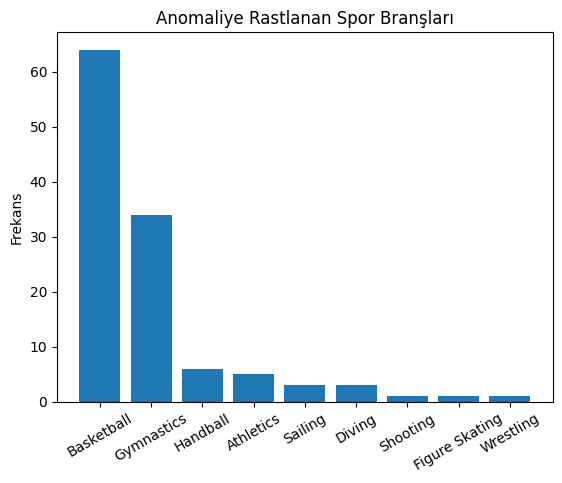

In [18]:
plt.figure()
plt.bar(veri_anomali.spor.value_counts().index,veri_anomali.spor.value_counts().values)
plt.xticks(rotation = 30)
plt.title("Anomaliye Rastlanan Spor Branşları")
plt.ylabel("Frekans")


In [20]:
veri_gym = veri_anomali[veri_anomali.spor == "Gymnastics"]
veri_gym

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,...,madalya,Shooting,Sailing,Athletics,Basketball,Gymnastics,Handball,Figure Skating,Diving,Wrestling
1736,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,...,Gold,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
2802,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,...,Silver,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
3187,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,...,Gold,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
6486,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,...,Gold,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
7311,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,...,Gold,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
7312,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,...,Gold,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
9561,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,...,Gold,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
9562,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,...,Gold,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
9563,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,...,Bronze,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
11245,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,...,Silver,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics


In [21]:
veri_gym.etkinlik.value_counts()

etkinlik
Gymnastics Women's Team All-Around          21
Gymnastics Women's Uneven Bars               6
Gymnastics Women's Balance Beam              3
Gymnastics Women's Floor Exercise            2
Gymnastics Women's Individual All-Around     1
Gymnastics Women's Horse Vault               1
Name: count, dtype: int64

In [22]:
veri_basketbol = veri_anomali[veri_anomali.spor == "Basketball"]
veri_basketbol

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,...,madalya,Shooting,Sailing,Athletics,Basketball,Gymnastics,Handball,Figure Skating,Diving,Wrestling
1086,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,...,Silver,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
1087,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,...,Silver,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
2848,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,...,Bronze,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
2849,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,...,Gold,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
3465,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,...,Bronze,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39644,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,...,Silver,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
39645,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,...,Gold,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
39646,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,...,Bronze,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics
39736,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,...,Bronze,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics,Gymnastics


In [24]:
veri_basketbol.etkinlik.value_counts()

etkinlik
Basketball Men's Basketball      62
Basketball Women's Basketball     2
Name: count, dtype: int64

**Zaman Serilerinde Veri Analizi**

Yıllara Göre Ortalama Yaş, Boy ve Kilo Değişimi

Yıllara Göre Madalya Sayıları

In [25]:
veri_zaman = veri.copy()
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [26]:
essiz_yillar = veri_zaman.yil.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896])

In [27]:
# olimpiyatların yapıldığı yılları sıralayalım
dizili_array = np.sort(veri_zaman.yil.unique())
dizili_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

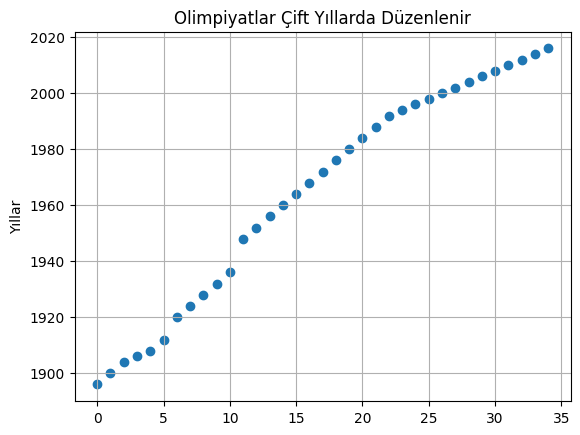

In [29]:
plt.figure()
plt.scatter(range(len(dizili_array)),dizili_array)
plt.grid(True)
plt.ylabel("Yıllar")
plt.title("Olimpiyatlar Çift Yıllarda Düzenlenir")
plt.show()

In [ ]:
# Grafik 1. dünya savaşı ile 2. dünya savaşı sırasında olimpiyatların yapılmadığını ve
# olimpiyatların iki yılda bir yapıldığını göstermektedir.

In [31]:
# yıl değerlerini datetime veri tipine dönüştür
tarih_saat_nesnesi = pd.to_datetime(veri_zaman["yil"],format='%Y')
print(type(tarih_saat_nesnesi))
tarih_saat_nesnesi.head(3)

<class 'pandas.core.series.Series'>


0   1900-01-01
1   1920-01-01
2   1920-01-01
Name: yil, dtype: datetime64[ns]

In [32]:
veri_zaman["tarih_saat"] = tarih_saat_nesnesi
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,yil,sezon,sehir,spor,etkinlik,madalya,tarih_saat
0,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
1,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
2,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [33]:
# veri_zaman değişkeninin ana indeksini, datetime tipi alan tarih_saat değerine güncelle
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yil"],axis = 1, inplace=True)
veri_zaman

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya
tarih_saat,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
2014-01-01,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1948-01-01,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...
1956-01-01,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.00,80.00,Soviet Union,URS,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
1964-01-01,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.00,80.00,Soviet Union,URS,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
1980-01-01,Bogusaw Zych,M,28.0,182.00,82.00,Poland,POL,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze


Yıllara Göre Madalya Sayıları

In [63]:
veri_zaman = pd.get_dummies(veri_zaman, columns = ['madalya'])
veri_zaman.head(3)

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
1900-01-01,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,False,True,False
1920-01-01,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,True,False,False
1920-01-01,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,True,False,False


In [65]:
periyodik_veri = veri_zaman.resample("2A").sum()
periyodik_veri.head()
# kayıp verileri çıkaralım
periyodik_veri = periyodik_veri[~(periyodik_veri == 0).any(axis=1)]
periyodik_veri.tail()

,isim,cinsiyet,yas,boy,kilo,takim,uok,sezon,sehir,spor,etkinlik,madalya_Bronze,madalya_Gold,madalya_Silver
tarih_saat,,,,,,,,,,,,,,
2008-12-31,Ragnhild Margrethe AamodtJos Luis Abajo GmezMa...,FMFMMMMFMFFMFMMFMMFFMMFMFFMMMMMMMMMMMFMFMMMMFF...,53344.0,365157.91,152090.92,NorwaySpainRussiaBelarusFranceFranceAustraliaU...,NORESPRUSBLRFRAFRAAUSUSATJKTURRUSFRAROUARGCUBN...,SummerSummerSummerSummerSummerSummerSummerSumm...,BeijingBeijingBeijingBeijingBeijingBeijingBeij...,HandballFencingAthleticsCanoeingHandballHandba...,"Handball Women's HandballFencing Men's epee, I...",710,671,667
2010-12-31,"Richard ""Richy"" AdjeiMeghan Christina Agosta ...",MFMMMMFFFFMMFFMFMMMFFFFFMFMFMFFMMFFFFFMMMFFFMM...,13896.0,91395.00,37877.12,Germany-2CanadaSwitzerlandSwitzerlandCanadaGer...,GERCANSUISUICANGERGERFRACANJPNUSAFINUSAFRANORC...,WinterWinterWinterWinterWinterWinterWinterWint...,VancouverVancouverVancouverVancouverVancouverV...,BobsleighIce HockeySki JumpingSki JumpingSnowb...,Bobsleigh Men's TwoIce Hockey Women's Ice Hock...,171,174,175
2012-12-31,Luc AbaloJennifer AbelDenis Mikhaylovich Ablya...,MFMMMMFFFMFFFMMMFFMMMFMMMFMMMMFMFFMMMMFMMMFMFM...,50595.0,346091.47,143102.94,FranceCanadaRussiaRussiaEgyptFranceNetherlands...,FRACANRUSRUSEGYFRANEDGBRNZLGERBRAGBRGBRUSAUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,LondonLondonLondonLondonLondonLondonLondonLond...,HandballDivingGymnasticsGymnasticsFencingHandb...,Handball Men's HandballDiving Women's Synchron...,679,632,630
2014-12-31,Juhamatti Tapio AaltonenJeremy AbbottVictoria ...,MMFFMFMMMMMFMMMFMMMMMMMFMFFFFFMMMMFMMMFFFMMMMF...,15907.0,104686.00,42838.63,FinlandUnited StatesGreat BritainCanadaSwedenS...,FINUSAGBRCANSWESUIUSARUSRUSRUSRUSUSAGBRUSARUSC...,WinterWinterWinterWinterWinterWinterWinterWint...,SochiSochiSochiSochiSochiSochiSochiSochiSochiS...,Ice HockeyFigure SkatingCurlingIce HockeyIce H...,Ice Hockey Men's Ice HockeyFigure Skating Mixe...,198,202,197
2016-12-31,Giovanni AbagnalePatimat AbakarovaLuc AbaloSae...,MFMMMMMMMMFFFFMMMMMMFFFMMMFMMMMMFFMFMMFMMMFMFM...,53256.0,360846.03,149628.71,ItalyAzerbaijanFranceIranRussiaRussiaRussiaAus...,ITAAZEFRAIRIRUSRUSRUSAUSESPJORNEDGBRUSANZLUSAU...,SummerSummerSummerSummerSummerSummerSummerSumm...,Rio de JaneiroRio de JaneiroRio de JaneiroRio ...,RowingTaekwondoHandballWrestlingGymnasticsGymn...,Rowing Men's Coxless PairsTaekwondo Women's Fl...,703,665,655
